# How frequently have I been running these notebooks?

In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from databuddy import get_data

In [22]:
git_log = !git log

In [23]:
dates = [line[8:] for line in git_log if line.startswith("Date")]

In [4]:
data = get_data()

In [24]:
dates_ind = pd.to_datetime(dates)

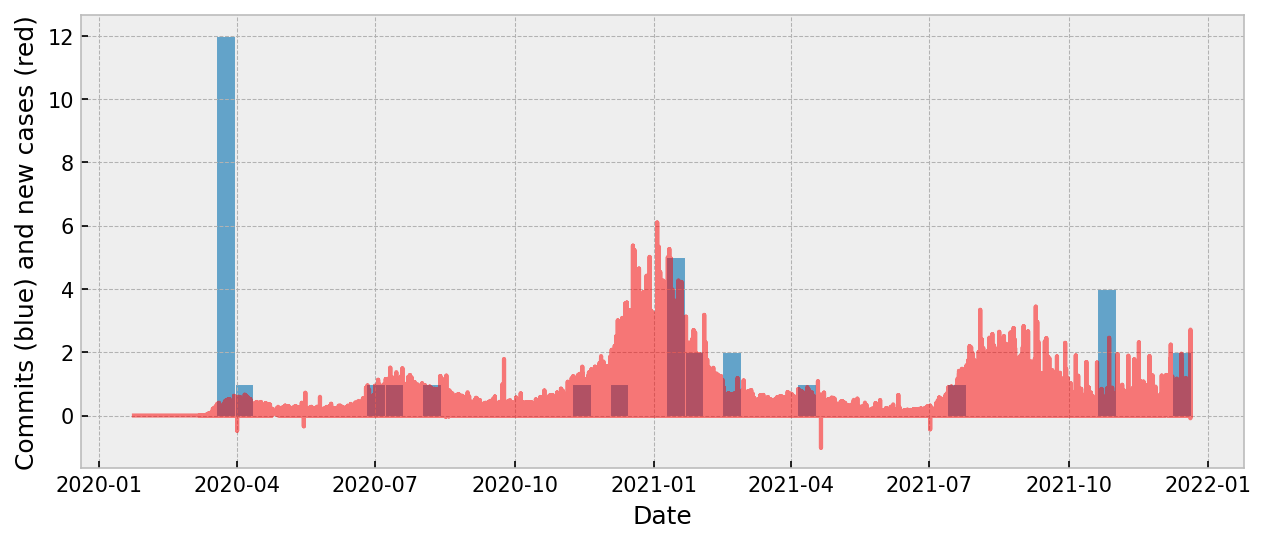

In [26]:
with plt.style.context("bmh"):
    plt.figure(figsize=(10, 4), dpi=150)
    plt.plot(data.created_at, data.new_case/10e3, c='r', alpha=0.5)
    sns.histplot(dates_ind, bins=52, ax=plt.gca())
    plt.ylabel("Commits (blue) and new cases (red)")
    plt.xlabel("Date")